In [115]:
# Finance Data Project 

#In this data project I focus on exploratory data analysis of stock prices using knowledge on visualization, pandas and other python frameworks.
#Here focus is on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [116]:
#The Imports
import pandas_datareader.data as web
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

In [117]:
# Get data using pandas datareader. Get stock information for the following banks:
# Bank of America
# CitiGroup
# Goldman Sachs
# JPMorgan Chase
# Morgan Stanley
# Wells Fargo

# Got the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. 
# Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol.

start = datetime(2006, 1, 1)
end = datetime(2016, 1, 1)

# Bank of America
BAC = web.DataReader('BAC', 'yahoo', start, end)

# CitiGroup
C = web.DataReader('C', 'yahoo', start, end)

# Goldman Sachs
GS = web.DataReader('GS', 'yahoo', start, end)

# JPMorgan Chase
JPM = web.DataReader('JPM', 'yahoo', start, end)

# Morgan Stanley
MS = web.DataReader('MS', 'yahoo', start, end)

# Wells Fargo
WFC = web.DataReader('WFC', 'yahoo', start, end)

In [118]:
# Created a list of the ticker symbols (as strings) in alphabetical order.

tickers = ['BAC','C','GS','JPM','MS','WFC']

In [119]:
# Concatenated the bank dataframes together to a single data frame called bank_stocks.

bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], keys=tickers,axis=1)
# print(bank_stocks)

In [120]:
# Set the column name levels.
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.811729  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.442013  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.486385  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.434616  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.456806  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.140598  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.166069  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.267979  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.306194  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.701099  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.324865  
2006-01-04   31.799999  31.530001  10870000.0  20.089125  
2006-01-05   31.500000  31.495001  10158000.0  20.066822  
2006-01-06   31.580000  31.680000   8403800.0  20.184694  
2006-01-09   31.674999  31.674999   5619600.0  20.181515  

[5 rows x 36 columns]

In [121]:
# bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

#create empty dataframe
returns = pd.DataFrame()

# Percentage change between the current and a prior element.
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [122]:
# Max Close price for each bank's stock throughout the time period:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

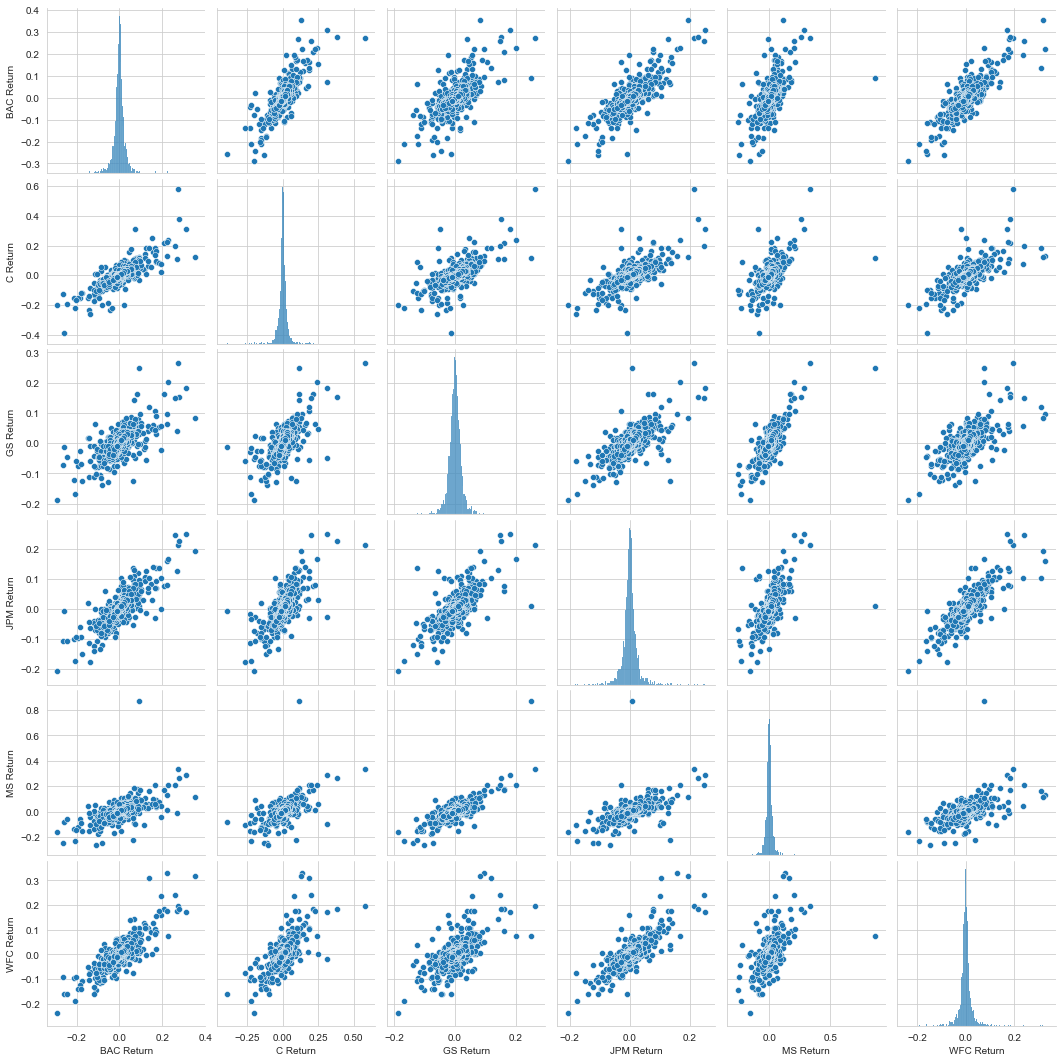

In [123]:
# Pairplot using seaborn of the returns dataframe to visualize who did better and when:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

In [124]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [125]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
#https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may : URL for citi bank stock split
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [126]:
#Looking at the standard deviation Citibank stock is the riskiest over the entire time period:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [127]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or Bank of america for year 2015

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

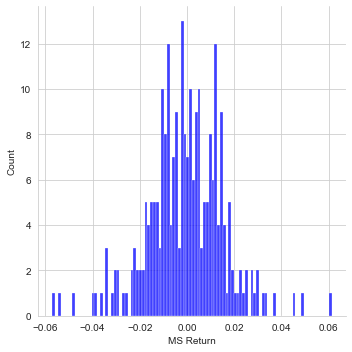

In [128]:
# Distplot using seaborn of the 2015 returns for Morgan Stanley:
sns.displot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='blue',bins=100)

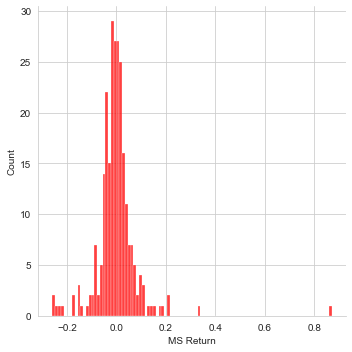

In [129]:
# Distplot using seaborn of the 2008 returns for CitiGroup:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['MS Return'],color='red',bins=100)

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

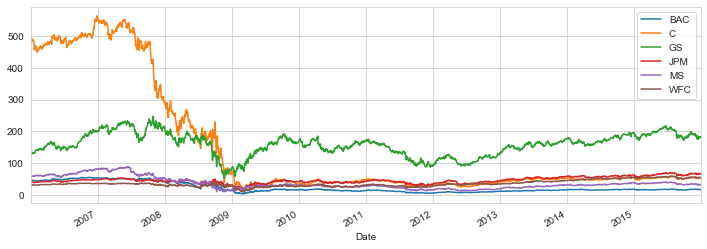

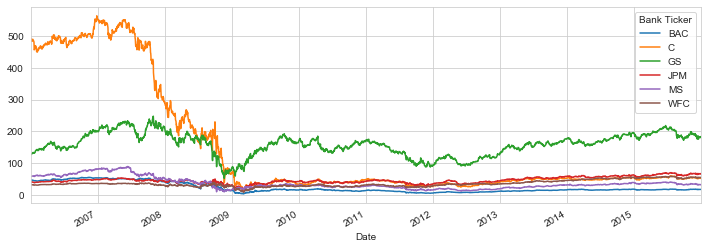

In [131]:
# # Line plot showing Close price for each bank for the entire index of time.
for C_price in tickers:
    bank_stocks[C_price]['Close'].plot(figsize=(12,4),label=C_price)
plt.legend()

# # Or you can try this code as well using .xs()
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

# Use plothly with .iplot() to see detaol at every point on graph
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

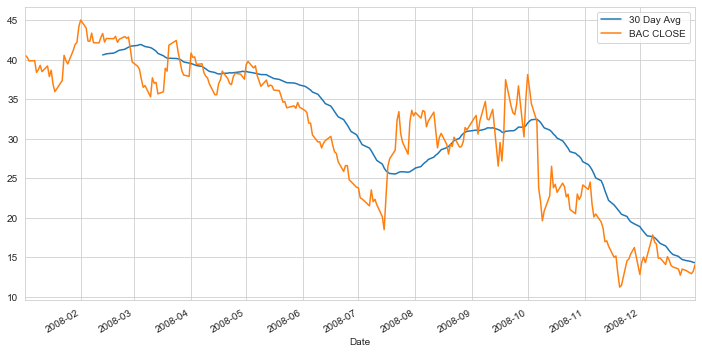

In [132]:
# The rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

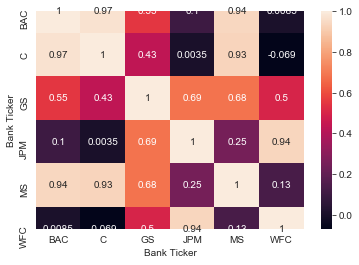

In [133]:
# a heatmap of the correlation between the stocks Close Price
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

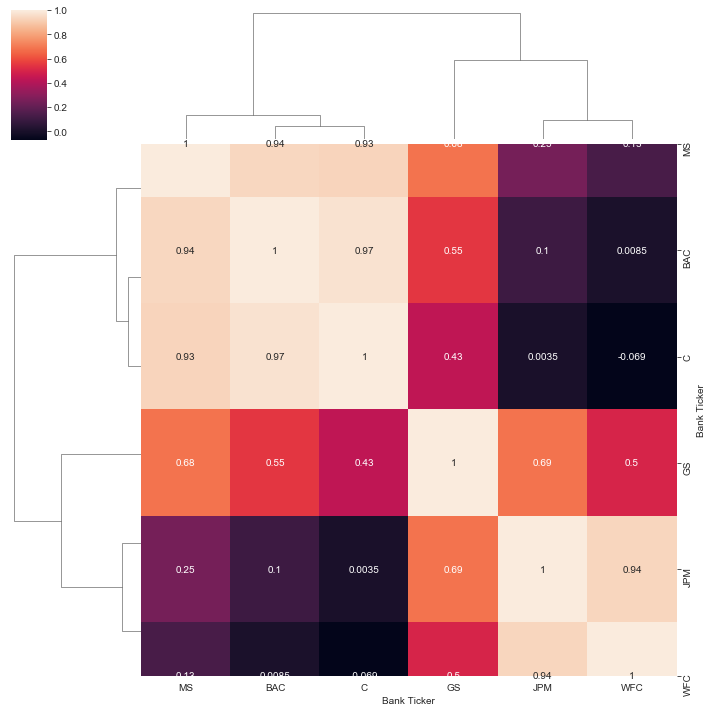

In [134]:
# seaborn's clustermap to cluster the correlations together.
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [135]:
#  Heat map with plotly:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [136]:
#################################### Cufflinks ###############################################
# Used .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.
# Candle plot is helpful in market analysis of stocks:

BAC15 = BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01']
BAC15.iplot(kind='candle')

In [137]:
# Used .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.
MS15 = MS['Close'].loc['2015-01-01':'2016-01-01']
MS15.ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [83]:
# Used .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.
# ta : technical analysis
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')